# Global sales prediction model

In [9]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [10]:
games = pd.read_csv('Data/cleaned_df')
games.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,release_era
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.00,322.0,Others,E,2000-2010
1,Super Mario Bros.,Others,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.30,709.0,Others,E,2000-2010
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.00,192.0,Others,E,2000-2010
4,Pokemon Red/Pokemon Blue,Others,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.0,9.0,8.74,817.4,missing,missing,pre-2000s


In [11]:
#make a copy of the datset and drop columns that are of no use here
games2 = games.copy()
games2.drop(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'name', 'year_of_release'], axis=1, inplace=True)

games2.head()

,platform,genre,publisher,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,release_era
0,Wii,Sports,Nintendo,82.53,76.0,51.0,8.00,322.0,Others,E,2000-2010
1,Others,Platform,Nintendo,40.24,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s
2,Wii,Racing,Nintendo,35.52,82.0,73.0,8.30,709.0,Others,E,2000-2010
3,Wii,Sports,Nintendo,32.77,80.0,73.0,8.00,192.0,Others,E,2000-2010
4,Others,Role-Playing,Nintendo,31.37,90.0,9.0,8.74,817.4,missing,missing,pre-2000s


In [12]:
games2.dtypes

platform         object
genre            object
publisher        object
global_sales    float64
critic_score    float64
critic_count    float64
user_score      float64
user_count      float64
developer        object
rating           object
release_era      object
dtype: object

In [13]:
games2.describe(include='object')

,platform,genre,publisher,developer,rating,release_era
count,16713,16713,16713,16713,16713,16713
unique,10,12,10,10,9,3
top,Others,Action,Others,Others,missing,2000-2010
freq,4284,3369,8923,8939,6764,10689


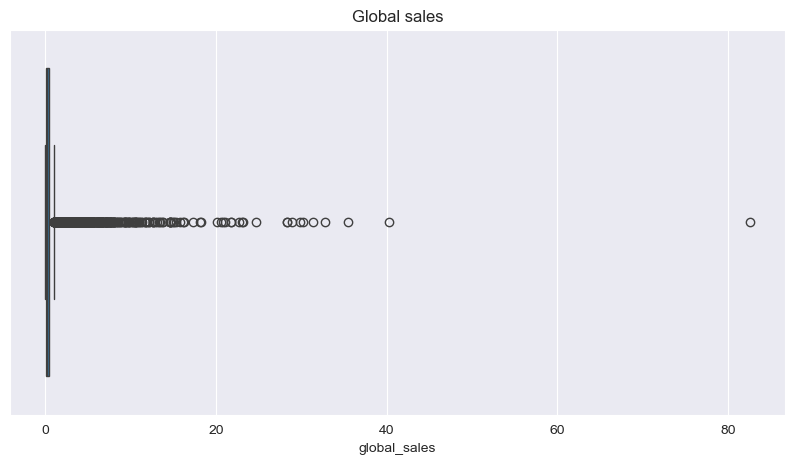

In [14]:
plt.subplots(figsize=(10,5))

sns.boxplot(data=games2, x='global_sales')
plt.title('Global sales')
plt.show()

We observe that there is a case of extreme outliers in the global sales column, with the maximum value far away from the rest of the values in the distribution.

In [49]:
games2.describe(include='float64')

,global_sales,critic_score,critic_count,user_score,user_count
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.533568,71.198493,24.557533,7.255222,189.098075
std,1.548125,11.677788,15.003701,1.147303,437.080567
min,0.010000,13.000000,3.000000,0.000000,4.000000
25%,0.060000,65.000000,13.200000,6.740000,17.000000
50%,0.170000,70.800000,24.000000,7.340000,43.400000
75%,0.470000,80.000000,31.400000,7.900000,221.800000
max,82.530000,98.000000,113.000000,9.700000,10665.000000


In [15]:
games2 = games2[games2['global_sales']<=60]
games2['global_sales'].describe()

#this is used to filter out the extreme outlier case

count    16712.000000
mean         0.528662
std          1.412259
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         40.240000
Name: global_sales, dtype: float64

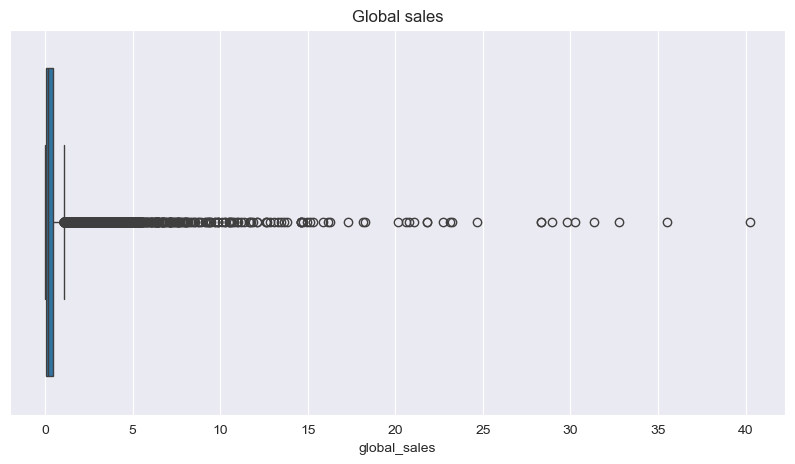

In [51]:
plt.subplots(figsize=(10,5))

sns.boxplot(data=games2, x='global_sales')
plt.title('Global sales')
plt.show()

In [16]:
games2.head()

,platform,genre,publisher,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,release_era
1,Others,Platform,Nintendo,40.24,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s
2,Wii,Racing,Nintendo,35.52,82.0,73.0,8.30,709.0,Others,E,2000-2010
3,Wii,Sports,Nintendo,32.77,80.0,73.0,8.00,192.0,Others,E,2000-2010
4,Others,Role-Playing,Nintendo,31.37,90.0,9.0,8.74,817.4,missing,missing,pre-2000s
5,Others,Puzzle,Nintendo,30.26,74.2,28.8,6.24,1448.2,missing,missing,pre-2000s


In [17]:
games2df = pd.get_dummies(games2, columns=['platform', 'release_era', 'genre', 'publisher', 'developer', 'rating'])
games2df.dtypes

global_sales                              float64
critic_score                              float64
critic_count                              float64
user_score                                float64
user_count                                float64
platform_DS                                  bool
platform_Others                              bool
platform_PC                                  bool
platform_PS                                  bool
platform_PS2                                 bool
platform_PS3                                 bool
platform_PSP                                 bool
platform_Wii                                 bool
platform_X360                                bool
platform_XB                                  bool
release_era_2000-2010                        bool
release_era_post-2010                        bool
release_era_pre-2000s                        bool
genre_Action                                 bool
genre_Adventure                              bool


In [18]:
def change_datatype(data):
    for col_name in data.columns:
        if data[col_name].dtype == 'bool':
            data[col_name]=data[col_name].astype(int)
    return data

games2df = change_datatype(games2df)
games2df.dtypes

global_sales                              float64
critic_score                              float64
critic_count                              float64
user_score                                float64
user_count                                float64
platform_DS                                 int32
platform_Others                             int32
platform_PC                                 int32
platform_PS                                 int32
platform_PS2                                int32
platform_PS3                                int32
platform_PSP                                int32
platform_Wii                                int32
platform_X360                               int32
platform_XB                                 int32
release_era_2000-2010                       int32
release_era_post-2010                       int32
release_era_pre-2000s                       int32
genre_Action                                int32
genre_Adventure                             int32


In [19]:
games2df.head()

,global_sales,critic_score,critic_count,user_score,user_count,platform_DS,platform_Others,platform_PC,platform_PS,platform_PS2,...,developer_missing,rating_AO,rating_E,rating_E10+,rating_EC,rating_K-A,rating_M,rating_RP,rating_T,rating_missing
1,40.24,74.2,28.8,6.24,1448.2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,35.52,82.0,73.0,8.30,709.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,32.77,80.0,73.0,8.00,192.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,31.37,90.0,9.0,8.74,817.4,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,30.26,74.2,28.8,6.24,1448.2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [20]:
#importing all libraries needed

import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [21]:
#splitting the data

y = games2df['global_sales']
X = games2df.drop(columns=['global_sales'])

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
##rescaling

x_scaler = StandardScaler()
y_scaler = StandardScaler()

#rescaling the train data
X_train_scaled = x_scaler.fit_transform(X_train)

#convert series to numpy array
y_train_array = y_train if isinstance(y_train, np.ndarray) else y_train.values
y_train_scaled = y_scaler.fit_transform(y_train_array.reshape(-1,1)).flatten() 
#reshapes the target variable to a 2-D array for compatibility with the standardscaler
#flatten converts it to the original format

#rescaling the test data
X_test_scaled = x_scaler.transform(X_test)

#convert series to numpy array
y_test_array = y_test if isinstance(y_test, np.ndarray) else y_test.values
y_test_scaled = y_scaler.transform(y_test_array.reshape(-1,1)).flatten()

In [23]:
##define models

dt_model = tree.DecisionTreeRegressor(max_depth=200)
svr_model = svm.SVR(kernel='rbf')
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
bayes_model = BayesianRidge(compute_score=True)
lass_model = Lasso(alpha=0.1)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
linear_model = LinearRegression()

In [24]:
#Decision tree
dt = dt_model.fit(X_train_scaled, y_train_scaled)
y_pred_tree = dt_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_tree = r2_score(y_test_scaled, y_pred_tree)
rsme_tree = math.sqrt(mean_squared_error(y_test_scaled, y_pred_tree))
rsme_tree, r2_score_tree

(1.078999696847673, -0.09029757922393178)

In [25]:
#Support Vector Regression
svr_model.fit(X_train_scaled, y_train_scaled)
y_pred_svr = svr_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_svr = r2_score(y_test_scaled, y_pred_svr)
rsme_svr = math.sqrt(mean_squared_error(y_test_scaled, y_pred_svr))
rsme_svr, r2_score_svr

(0.8924307491015012, 0.25415006904831194)

In [26]:
#Random Forest Regressor
rf_model.fit(X_train_scaled, y_train_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_rf = r2_score(y_test_scaled, y_pred_rf)
rsme_rf = math.sqrt(mean_squared_error(y_test_scaled, y_pred_rf))
rsme_rf, r2_score_rf

(0.9041423697339052, 0.23444562001305946)

In [27]:
#Bayes Ridge regression
bayes_model.fit(X_train_scaled, y_train_scaled)
y_pred_bayes = bayes_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_bayes = r2_score(y_test_scaled, y_pred_bayes)
rsme_bayes = math.sqrt(mean_squared_error(y_test_scaled, y_pred_bayes))
rsme_bayes, r2_score_bayes

(0.9233387072463017, 0.2015927232990209)

In [28]:
#Lasso regression
lass_model.fit(X_train_scaled, y_train_scaled)
y_pred_lass = lass_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_lass = r2_score(y_test_scaled, y_pred_lass)
rsme_lass = math.sqrt(mean_squared_error(y_test_scaled, y_pred_lass))
rsme_lass, r2_score_lass

(0.9626043084315966, 0.13224324154275313)

In [29]:
#XGB regression
xgb_model.fit(X_train_scaled, y_train_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_xgb = r2_score(y_test_scaled, y_pred_xgb)
rsme_xgb = math.sqrt(mean_squared_error(y_test_scaled, y_pred_xgb))
rsme_xgb, r2_score_xgb

(0.9072422685382302, 0.22918713549743142)

In [30]:
#linear regression
linear_model.fit(X_train_scaled, y_train_scaled)
y_pred_lin = linear_model.predict(X_test_scaled)

#R2 score and the mean squared error
r2_score_lin = r2_score(y_test_scaled, y_pred_lin)
rsme_lin = math.sqrt(mean_squared_error(y_test_scaled, y_pred_lin))
rsme_lin, r2_score_lin

(0.9231739390357623, 0.20187764669626296)

In [31]:
model_results = pd.DataFrame({
                    'Algorithms': ['DT', 'SVR', 'RF', 'Bayes', 'Lasso', 'XGB', 'Linear'],
                    'RSME': [rsme_tree, rsme_svr, rsme_rf, rsme_bayes,rsme_lass,rsme_xgb, rsme_lin],
                    'R2': [r2_score_tree, r2_score_svr, r2_score_rf, r2_score_bayes, r2_score_lass,r2_score_xgb, r2_score_lin]
})
round(model_results,3)

,Algorithms,RSME,R2
0,DT,1.079,-0.090
1,SVR,0.892,0.254
2,RF,0.904,0.234
3,Bayes,0.923,0.202
4,Lasso,0.963,0.132
5,XGB,0.907,0.229
6,Linear,0.923,0.202


## Conclusion

The Support Vector regression model is the best performing model in this comparison, with the lowest RMSE and the highest R² value. It best explains the variability in global sales. The RF and XGB models also perform well, with relatively low RMSE and decent R² values. The DT model however performs the worst as indicated by its high RMSE and negative R² values.